In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re #regular expressions
import spacy #natural language processing import pandas as pd
import seaborn as sns
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Making Product Count_Final Project/Diabetes Continuous Glucose Monitoring – Data Export.xlsx')
df.head()

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,NaN,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,https://scontent-iad3-1.cdninstagram.com/v/t51...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,NaN,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the percentage of missing values in each column
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'percent_missing %': percent_missing})
missing_value_df

,percent_missing %
Post ID,0.00
Sound Bite Text,0.00
Ratings and Scores,100.00
Title,4.15
Source Type,0.00
...,...
LexisNexis Subject Group 1,100.00
LexisNexis Subject 1,100.00
LexisNexis Subject Group 2,100.00
LexisNexis Subject 2,100.00


## It turns out many columns have 100% missing values. So I will drop columns containing 90% missing values or NaN values. 

In [ ]:
# Delete columns containing either 90% or more than 90% NaN Values
perc = 90.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df1 = df.dropna(axis=1,thresh=min_count)
df1.head()

,Post ID,Sound Bite Text,Title,Source Type,Post Type,Is Paid,Media Type,URL,Domain,Sentiment,...,Author Gender,Author URL,Author Name,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Positive Objects,Negative Objects,Richness,Reddit Score,Source Name
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/itsgucciflipflopsbro,itsgucciflipflopsbro,4472,42768.0,number,NaN,0,0,r/diabetes_t1
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Positives,...,Unknown,https://www.reddit.com/user/Unrealgecko,Unrealgecko,5502,42760.0,NaN,NaN,1,0,r/diabetes_t1
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,twitter.com,Positives,...,Unknown,http://twitter.com/bromid,dimo,-,1912.0,"dexcom g6, omnipod system",NaN,3,-,NaN
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,instagram.com,Neutrals,...,Unknown,NaN,NaN,-,NaN,NaN,NaN,0,-,NaN
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/rinkidinkidoo,rinkidinkidoo,2976,93772.0,NaN,NaN,2,0,r/diabetes


In [ ]:
# Check the percentage of missing values in each column
percent_missing = round(df1.isnull().sum() * 100 / len(df1),2)
missing_value_df = pd.DataFrame({'percent_missing %': percent_missing})
missing_value_df

,percent_missing %
Post ID,0.00
Sound Bite Text,0.00
Title,4.15
Source Type,0.00
Post Type,7.08
Is Paid,0.00
Media Type,0.00
URL,0.00
Domain,0.00
Sentiment,0.00


In [ ]:
df2 = df1.drop(['Positive Objects','Negative Objects'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      37844 non-null  object 
 1   Sound Bite Text                              37844 non-null  object 
 2   Title                                        36273 non-null  object 
 3   Source Type                                  37844 non-null  object 
 4   Post Type                                    35165 non-null  object 
 5   Is Paid                                      37844 non-null  object 
 6   Media Type                                   37844 non-null  object 
 7   URL                                          37844 non-null  object 
 8   Domain                                       37844 non-null  object 
 9   Sentiment                                    37844 non-null  object 
 10

In [ ]:
# replace with regular expressioln
import re
df3 = df2.copy()
df3["Text_clean"] = df2["Sound Bite Text"].str.lower()

testing = pd.DataFrame({"text": ["This is a dexcom freestyles", "This is a dexcoms libree", "This is a dexcome dexcoma f f"]})
print(testing)

testing.text.replace(to_replace= ['dex.*\s'], value='dexcom', regex=True, inplace = True)
testing.text.replace(to_replace= ['freestyle.*\s'], value='freestyle', regex=True, inplace = True)
testing.text.replace(to_replace= ['Libre.*\s'], value='Libre', regex=True, inplace = True)
print(testing)

#df3["Text_clean"].replace(to_replace= ['dexco.*'], value='dexcom', regex=True, inplace = True)
#df3["Text_clean"].replace(to_replace= ['freestyle.*'], value='freestyle', regex=True, inplace = True)
#df3["Text_clean"].replace(to_replace= ['Libre.*'], value='Libre', regex=True, inplace = True)
#df3.to_csv('/content/drive/MyDrive/Making Product Count_Final Project/test.csv')

                            text
0    This is a dexcom freestyles
1       This is a dexcoms libree
2  This is a dexcome dexcoma f f
                         text
0  This is a dexcomfreestyles
1      This is a dexcomlibree
2           This is a dexcomf


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')  # load spaCy's built-in English models
texts = df3['Text_clean'].to_numpy()
tokens = []
# import WhitespaceTokenizer() method from nltk
from nltk.tokenize import WhitespaceTokenizer
     
# Create a reference variable for Class WhitespaceTokenizer
tk = WhitespaceTokenizer()
for txt in texts:
    token = [word for word in tk.tokenize(txt.lower()) if word not in nlp.Defaults.stop_words and len(word) > 2]
    tokens.append(' '.join(token))

In [ ]:
texts[2]

"i ran out of characters. youtu.be/rwgl2pdhqim i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom"

In [ ]:
tokens[2]

"ran characters. youtu.be/rwgl2pdhqim i'll newly diagnosed idea feel, react, etc, i'm resource. use dexcom"

In [ ]:
def getCategory(token):
    if 'dexcom' in token:
        if 'libre' in token or 'freestyle' in token:
            return 'both'
        else:
            return 'dexcom'
    elif 'libre' in token or 'freestyle' in token:
        return 'Freestyle Libre'
    elif 'dexcom' in token:
        return 'both' 
    else:
        return 'none'

In [ ]:
category = []
for token in tokens:
    category.append(getCategory(token))

df3["Category"] = category

In [ ]:
df3.Category.value_counts()

dexcom             17558
none               14773
Freestyle Libre     4712
both                 801
Name: Category, dtype: int64

In [ ]:
df2['Category'] = category
df2['Tokenized text'] = tokens
df2

,Post ID,Sound Bite Text,Title,Source Type,Post Type,Is Paid,Media Type,URL,Domain,Sentiment,...,Author Gender,Author URL,Author Name,Author Reddit Karma,Followers/Daily Unique Visitors/Subscribers,Richness,Reddit Score,Source Name,Category,Tokenized text
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/itsgucciflipflopsbro,itsgucciflipflopsbro,4472,42768.0,0,0,r/diabetes_t1,dexcom,numbers great now. estimated a1c 7%ish. doesn'...
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Positives,...,Unknown,https://www.reddit.com/user/Unrealgecko,Unrealgecko,5502,42760.0,1,0,r/diabetes_t1,dexcom,tried little while. effects help insulin resis...
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,twitter.com,Positives,...,Unknown,http://twitter.com/bromid,dimo,-,1912.0,3,-,NaN,dexcom,ran characters. youtu.be/rwgl2pdhqim i'll newl...
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,instagram.com,Neutrals,...,Unknown,NaN,NaN,-,NaN,0,-,NaN,dexcom,lunch! ate 10:30am unit novolog insulin pump g...
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/rinkidinkidoo,rinkidinkidoo,2976,93772.0,2,0,r/diabetes,none,like soak hot tub potential exists lowered blo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37839,BRDRDT2-t1_imokb3b,"Push for it, it's a game changer in my opinion...",If you were magically cured of type I diabetes...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Neutrals,...,Male,https://www.reddit.com/user/TimBroth,TimBroth,8040,42768.0,0,5,r/diabetes_t1,none,"push it, it's game changer opinion. course com..."
37840,BRDRDT2-t1_imn2fob,(My mom learned to inject my 10 year old self ...,A question for the older Diabetics.,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Negatives,...,Unknown,https://www.reddit.com/user/ThrowAw2009,ThrowAw2009,265,42760.0,3,3,r/diabetes_t1,dexcom,"(my mom learned inject year old self oranges, ..."
37841,BRDRDT2-t1_imod0qi,I just spoke with a rep from Abbott. The rep t...,Apple IOS 16 public beta,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/Freestylelibre/commen...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/Any_Sheepherder1359,Any_Sheepherder1359,1,2625.0,0,0,r/Freestylelibre,Freestyle Libre,spoke rep abbott. rep told plans update freest...
37842,17865491111775314,It’s been 2.5 weeks since I started and I’m fe...,NaN,Instagram,Original,No,No Media,https://www.instagram.com/reel/Ch7ctN_ge5r/,instagram.com,Neutrals,...,Unknown,NaN,NaN,-,NaN,3,-,NaN,none,it’s 2.5 weeks started i’m feeling better lite...


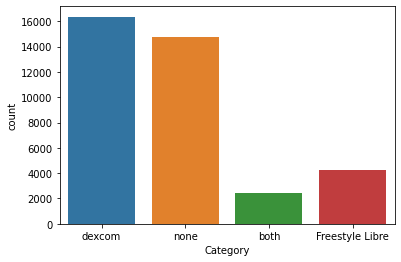

In [ ]:
sns.countplot(x='Category', data=df2)

In [ ]:
df2.Category.value_counts()

dexcom             16366
none               14774
Freestyle Libre     4233
both                2471
Name: Category, dtype: int64

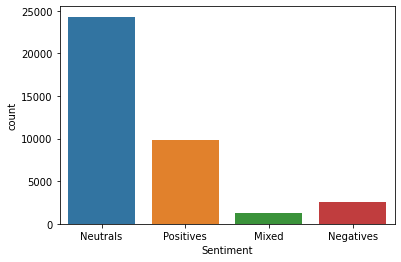

In [ ]:
# Create a bar plot with value counts
sns.countplot(x='Sentiment', data=df2)

In [ ]:
# Create data cleaning function
def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    #if True:
    #    text = text.split()
    #    new_text = []
    #    for word in text:
    #        if word in contractions:
    #            new_text.append(contractions[word])
    #        else:
    #            new_text.append(word)
    #    text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

In [ ]:
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

In [ ]:
df3 = df.copy()
df3.rename(columns = {'Sound Bite Text':'Sound_Bite_Text'}, inplace = True)
df3.head()

,Post ID,Sound_Bite_Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,NaN,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,https://scontent-iad3-1.cdninstagram.com/v/t51...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,NaN,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# https://towardsdatascience.com/hands-on-topic-modeling-with-python-1e3466d406d7
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# Create a list of review by applying text_preprocessing function
df3['Sound_Bite_Text_List'] = list(map(text_preprocessing, df3.Sound_Bite_Text))

# Return to string with to_string function
df3['Sound_Bite_Text_Clean'] = list(map(to_string, df3['Sound_Bite_Text_List']))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df3[["Sound_Bite_Text", "Sound_Bite_Text_List", "Sound_Bite_Text_Clean"]]

,Sound_Bite_Text,Sound_Bite_Text_List,Sound_Bite_Text_Clean
0,My numbers are great now. Estimated a1c of 7%i...,"[my, number, be, great, now, estimate, a1c, of...",my number be great now estimate a1c of ish he ...
1,I tried it for a little while. No side effects...,"[try, it, for, little, while, no, side, effect...",try it for little while no side effect and it ...
2,i ran out of characters. youtu.be/RWgl2PDhQiM ...,"[run, out, of, character, youtu, be, rwgl2pdhq...",run out of character youtu be rwgl2pdhqim ll a...
3,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,"[my, lunch, eat, at, 10, 30am, unit, novolog, ...",my lunch eat at 10 30am unit novolog insulin v...
4,This is also because like a soak in a hot tub ...,"[this, be, also, because, like, soak, in, hot,...",this be also because like soak in hot tub the ...
...,...,...,...
37839,"Push for it, it's a game changer in my opinion...","[push, for, it, it, game, changer, in, my, opi...",push for it it game changer in my opinion of c...
37840,(My mom learned to inject my 10 year old self ...,"[my, mom, learn, to, inject, my, 10, year, old...",my mom learn to inject my 10 year old self on ...
37841,I just spoke with a rep from Abbott. The rep t...,"[just, speak, with, rep, from, abbott, the, re...",just speak with rep from abbott the rep tell m...
37842,It’s been 2.5 weeks since I started and I’m fe...,"[it, be, weeks, since, start, and, feel, bette...",it be weeks since start and feel better than h...


In [ ]:
import re
def getCategory_2(list):
    brand = []
    for i in list:
      dexcom = re.search(r'^dexcom.', i) 
      libre = re.search(r'^libre.', i)
      free = re.search(r'^freestyle.', i)
      if dexcom != None:
        brand.append("dexcom")
      if libre != None:
        brand.append("libre")
      if free != None:
        brand.append("freestyle")
    if 'dexcom' in brand:
        if 'libre' in brand or 'freestyle' in brand:
            return 'both'
        else:
            return 'dexcom'
    elif 'libre' in brand or 'freestyle' in brand:
        return 'Freestyle Libre'
    elif 'dexcom' in brand:
        return 'both' 
    else:
        return 'none' 

#testing = ["dexcoms", "freestyle"]
#for i in testing:
#  if re.search(r'^dexcom', i) != None:
#    print(i)

In [ ]:
getCategory_2(list)

none    37844
Name: category, dtype: int64

In [ ]:
a = df3.loc[206]["Sound_Bite_Text_List"]
brand = []
for i in a:
  dexcom = re.search(r'^dexcom', i) 
  libre = re.search(r'^libre', i)
  free = re.search(r'^freestyle', i)
  if dexcom != None:
    brand.append("dexcom")
  if libre != None:
    brand.append("libre")
  if free != None:
    brand.append("freestyle")
print(a)
print(brand)

['use', '22mm', 'hole', 'punch', 'like', 'this', 'one']
[]


In [ ]:
if 'dexcom' in brand:
  if 'libre' in brand or 'freestyle' in brand:
    print('both')
  else:
    print('dexcom')
elif 'libre' in brand or 'freestyle' in brand:
  print('Freestyle Libre')
elif 'dexcom' in brand:
  print('both') 
else:
  print('none')

dexcom


In [ ]:
category_v2 = []
for i in range(0, len(df3)):
  category_v2.append(getCategory_2(df3["Sound_Bite_Text_List"][i]))

print(category_v2)
    

['dexcom', 'dexcom', 'dexcom', 'dexcom', 'none', 'dexcom', 'none', 'both', 'none', 'dexcom', 'Freestyle Libre', 'none', 'none', 'none', 'dexcom', 'none', 'dexcom', 'none', 'both', 'dexcom', 'none', 'none', 'dexcom', 'both', 'dexcom', 'dexcom', 'none', 'none', 'dexcom', 'none', 'none', 'Freestyle Libre', 'none', 'dexcom', 'dexcom', 'none', 'both', 'Freestyle Libre', 'none', 'dexcom', 'dexcom', 'dexcom', 'dexcom', 'dexcom', 'none', 'both', 'dexcom', 'dexcom', 'both', 'none', 'dexcom', 'dexcom', 'both', 'both', 'dexcom', 'none', 'dexcom', 'dexcom', 'none', 'dexcom', 'none', 'none', 'none', 'dexcom', 'none', 'dexcom', 'dexcom', 'dexcom', 'none', 'Freestyle Libre', 'dexcom', 'dexcom', 'dexcom', 'none', 'Freestyle Libre', 'dexcom', 'none', 'Freestyle Libre', 'dexcom', 'dexcom', 'Freestyle Libre', 'none', 'none', 'dexcom', 'dexcom', 'none', 'none', 'Freestyle Libre', 'none', 'none', 'dexcom', 'none', 'dexcom', 'dexcom', 'dexcom', 'dexcom', 'none', 'both', 'none', 'none', 'none', 'dexcom', 'no

In [ ]:
category = []
for i in range(0, len(df3)):
  category_v2.append(getCategory_2(df3["Sound_Bite_Text_List"][i]))

print(category_v2)

In [ ]:
getCategory_2(df3["Sound_Bite_Text_List"][206])

'none'

In [ ]:
df3["category_v2"] = category_v2
df3.head(10)

,Post ID,Sound_Bite_Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects,Sound_Bite_Text_List,Sound_Bite_Text_Clean,category_v2
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,NaN,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[my, number, be, great, now, estimate, a1c, of...",my number be great now estimate a1c of ish he ...,dexcom
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[try, it, for, little, while, no, side, effect...",try it for little while no side effect and it ...,dexcom
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[run, out, of, character, youtu, be, rwgl2pdhq...",run out of character youtu be rwgl2pdhqim ll a...,dexcom
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,https://scontent-iad3-1.cdninstagram.com/v/t51...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[my, lunch, eat, at, 10, 30am, unit, novolog, ...",my lunch eat at 10 30am unit novolog insulin v...,dexcom
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,NaN,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[this, be, also, because, like, soak, in, hot,...",this be also because like soak in hot tub the ...,none
5,17875966583693003,I’d like a new pancreas please ✌?? \n\n#type1d...,NaN,NaN,Instagram,Original,No,No Media,https://www.instagram.com/reel/Ch959C7OoP3/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[like, new, pancreas, please, type1diabetes, d...",like new pancreas please type1diabetes dexcomg...,dexcom
6,BRDRDT2-t1_imqhyj5,"I am a insulin dependent diabetic (type 1, T1D...",NaN,Game-Changing Discovery in Oral Insulin Tablet...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/sciences/comments/x2s...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[be, insulin, dependent, diabetic, type, t1d, ...",be insulin dependent diabetic type t1d and hav...,none
7,BRDRDT2-t1_imrqfpz,Currently impatiently waiting! I was told we (...,NaN,Libre 3,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/Type1Diabetes/comment...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[currently, impatiently, wait, be, tell, we, c...",currently impatiently wait be tell we canada s...,both
8,BRDRDT2-t1_impvxki,It depends on what insurance I have at that ti...,NaN,How do Americans manage to pay for their medic...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/AskReddit/comments/x3...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[it, depend, on, what, insurance, have, at, th...",it depend on what insurance have at that time ...,none
9,BRDRDT2-t3_x3grwj,I’m on the t-slim pump and Dexcom. Usually my ...,NaN,Why do I have high bg days?,Forums,Original,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[on, the, slim, pump, and, dexcom, usually, my...",on the slim pump and dexcom usually my number ...,dexcom


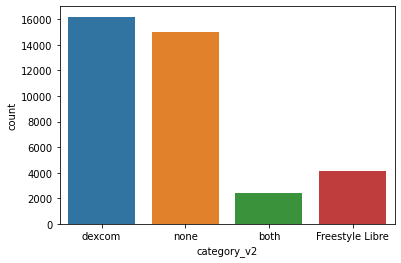

In [ ]:
# Create a bar plot with value counts
sns.countplot(x='category_v2', data=df3)